In [79]:
import numpy as np
import pandas as pd
import random
from time import process_time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import f1_score, accuracy_score
import matplotlib.pyplot as plt

#### Data Preprocessing

In [80]:
df = pd.read_csv("mlfa_a1.csv")

In [81]:
df.head()

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
0,10,13,12,4,7,9,10,1,8,7,3,14,8,5,7,12,12,11,8,1
1,10,11,11,10,14,7,7,5,5,4,2,15,13,7,6,5,5,4,4,1
2,10,15,3,2,14,8,10,1,4,7,2,7,3,3,6,11,3,3,15,1
3,10,11,10,10,15,7,7,1,5,4,2,15,13,7,4,4,4,4,4,1
4,8,11,7,8,10,7,8,1,5,3,2,15,5,3,6,12,5,4,7,1


In [82]:
df.describe()

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,9.666667,12.791667,11.083333,7.902778,13.347222,7.180556,8.611111,3.125000,8.486111,8.513889,5.388889,12.652778,9.694444,8.097222,6.166667,10.375000,10.541667,9.319444,10.277778,0.291667
std,1.186782,2.361293,3.033847,2.738148,2.374511,1.522844,1.515698,1.845722,4.907577,4.275686,3.400727,3.207209,4.130406,4.243171,2.897303,4.316485,4.366768,4.181874,4.482273,0.457719
min,2.000000,3.000000,3.000000,2.000000,6.000000,2.000000,4.000000,1.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,0.000000
25%,10.000000,11.000000,9.000000,6.000000,11.000000,6.000000,8.000000,1.000000,3.000000,5.000000,2.000000,11.000000,7.000000,3.000000,3.750000,6.750000,7.000000,5.000000,6.750000,0.000000
50%,10.000000,13.000000,11.000000,10.000000,15.000000,7.000000,9.000000,3.000000,7.000000,8.000000,4.000000,14.000000,11.000000,9.000000,6.500000,12.000000,12.000000,10.000000,11.000000,0.000000
75%,10.000000,15.000000,14.000000,10.000000,15.000000,8.000000,10.000000,5.000000,14.000000,13.000000,9.000000,15.000000,13.000000,11.250000,9.000000,14.250000,15.000000,13.000000,15.000000,1.000000
max,10.000000,15.000000,15.000000,10.000000,15.000000,10.000000,10.000000,5.000000,15.000000,15.000000,10.000000,15.000000,15.000000,15.000000,10.000000,15.000000,15.000000,15.000000,15.000000,1.000000


In [83]:
rows,cols = df.shape

In [84]:
columns = df.columns

In [85]:
columns = columns.drop(labels = "ca_cervix")

In [86]:
for column in df.columns:
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

In [87]:
df.head()

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
0,1.00,0.833333,0.750000,0.25,0.111111,0.875,1.000000,0.0,0.416667,0.333333,0.125,0.916667,0.416667,0.166667,0.625,0.750000,0.750000,0.666667,0.416667,1.0
1,1.00,0.666667,0.666667,1.00,0.888889,0.625,0.500000,1.0,0.166667,0.083333,0.000,1.000000,0.833333,0.333333,0.500,0.166667,0.166667,0.083333,0.083333,1.0
2,1.00,1.000000,0.000000,0.00,0.888889,0.750,1.000000,0.0,0.083333,0.333333,0.000,0.333333,0.000000,0.000000,0.500,0.666667,0.000000,0.000000,1.000000,1.0
3,1.00,0.666667,0.583333,1.00,1.000000,0.625,0.500000,0.0,0.166667,0.083333,0.000,1.000000,0.833333,0.333333,0.250,0.083333,0.083333,0.083333,0.083333,1.0
4,0.75,0.666667,0.333333,0.75,0.444444,0.625,0.666667,0.0,0.166667,0.000000,0.000,1.000000,0.166667,0.000000,0.500,0.750000,0.166667,0.083333,0.333333,1.0


In [88]:
X,y = df.iloc[:,:-2],df.iloc[:,-1]

In [89]:
p = np.ones((X.shape[0]))
X.insert(column = "ones", value = p, loc = 0)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=45)

#### Implementing SGD

In [91]:
#initialize theta 
t = np.ones((X_train.shape[1],1))

In [92]:
#define LR function
def lr(X,t):
    z = np.dot(X,t)
    return np.exp(z)/(np.exp(z)+1)

In [93]:
#Aplying batch gradient descent
def theta_b(r, e, t, X, y):
    l = []
    for epoch in range(e):
        t = t + r*np.dot(X.T,(y.values.reshape(-1,1) - lr(X, t)))
        
        liklihood = y.T.dot(np.log(lr(X,t))) +(np.ones(y.shape)-y).T.dot(np.log(np.ones(y.shape)-lr(X,t)))
        l.append(liklihood)
    return l,t

In [94]:
#Applying stochastic gradient descent
def theta_s(r, e, t, X, y):
    l = []
    for epoch in range(e):
        init = np.random.choice(X.shape[0])
        t = t + np.array(r*X.iloc[init]*(y.iloc[init] - lr(X.iloc[init], t))).reshape(-1,1)
            
        liklihood = y.T.dot(np.log(lr(X,t))) +(np.ones(y.shape)-y).T.dot(np.log(np.ones(y.shape)-lr(X,t)))
        l.append(liklihood)
    return l,t

In [95]:
l,t_new = theta_s(0.01, 10000, t, X_train, y_train)

<function matplotlib.pyplot.show(close=None, block=None)>

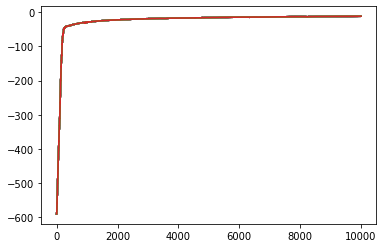

In [96]:
plt.plot(l)
plt.show

#### Implementing Logistic Regression

In [97]:
def logistic(X,t):
    p = lr(X,t)
    print(p)
    pred = []
    for i in range(len(p)):
        if p[i]<0.5:
            pred.append(0)
        else:
            pred.append(1)
    return pred

In [98]:
pred = logistic(X_test, t_new)
pred

[[0.00183997]
 [0.02017555]
 [0.06132901]
 [0.01838681]
 [0.8577437 ]
 [0.0197923 ]
 [0.00151254]
 [0.24278666]]


[0, 0, 0, 0, 1, 0, 0, 0]

In [99]:
y_test

67    0.0
48    0.0
28    0.0
52    0.0
10    1.0
49    0.0
70    0.0
21    0.0
Name: ca_cervix, dtype: float64

#### Score of the model

In [100]:
score = accuracy_score(y_test, pred)

#### Using Logistic regression model from Sklearn and comparing accuracy

In [101]:
model = LR(tol = 0.01, max_iter = 1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000, tol=0.01)

In [102]:
model.predict(X_test)

array([0., 0., 0., 0., 1., 0., 0., 0.])

In [103]:
model_score = model.score(X_test, y_test)

In [104]:
print("The score of the implemented model is", score, "whereas the score for the logistic regression model given in Sklern", model_score)

The score of the implemented model is 1.0 whereas the score for the logistic regression model given in Sklern 1.0


The score values change by changing the randomized state value in test_train_split function